In [1]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/major-project/notebooks/workings/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name="Strange18/results"

In [3]:
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)
tokenizer.src_lang = "ne_NP"

model = MBartForConditionalGeneration.from_pretrained(model_name, torch_dtype="float16")

In [4]:
continuous_sentence = "गौरा पर्वजस्ता मेलाहरूले हावा संगीत नृत्य र भक्तिले भरिन्छन्"

In [5]:
target_lang = "en_XX"

In [6]:
print(tokenizer.tokenize(continuous_sentence))

['▁गौर', 'ा', '▁पर्व', 'जस्ता', '▁मेला', 'हरूले', '▁हा', 'वा', '▁संगीत', '▁नृत्य', '▁र', '▁', 'भक्ति', 'ले', '▁भर', 'िन्छ', 'न्']


In [7]:
print(tokenizer.encode(continuous_sentence))

[250018, 116979, 1026, 105601, 196406, 129767, 60654, 5602, 3097, 55090, 163919, 774, 6, 142403, 535, 12533, 101905, 5500, 2]


In [8]:
inputs = tokenizer(continuous_sentence, return_tensors="pt")

In [9]:
inputs['input_ids']

tensor([[250018, 116979,   1026, 105601, 196406, 129767,  60654,   5602,   3097,
          55090, 163919,    774,      6, 142403,    535,  12533, 101905,   5500,
              2]])

In [10]:
inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [11]:
generated_tokens = model.generate(
    **inputs, forced_bos_token_id=tokenizer.lang_code_to_id[target_lang]
)

In [12]:
generated_tokens

tensor([[     2, 250004,     70,  44075,      7,   1884,  37144,     11,    366,
            330,  26292,     70,   1831,    678,  19612,  82393,    136,  30396,
           1363,      2]])

In [13]:
tokenizer.decode(330)

'va'

In [14]:
english_translation = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

In [15]:
english_translation

'the fairs like gaura parva fill the air with music dance and devotion'

In [16]:
print(dir(model))

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_assisted_decoding', '_auto_class', '_autoset_attn_implementation', '_backward_compatibility_gradient_checkpointing', '_backward_hooks', '_backward_pre_hooks', '_beam_search', '_buffers', '_call_impl', '_check_and_enable_flash_attn_2', '_check_and_enable_flex_attn', '_check_and_enable_sdpa', '_compiled_call_impl', '_constrained_beam_search', '_contrastive_search', '_convert_head_mask_to_5d', '_copy_lm_head_original_to_resized', '_create_repo', '_dispatch_accelerate_model', '_dola_decoding', '_expand_inputs_for_generation', '_extract_past_from_

In [21]:
model

MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): MBartScaledWordEmbedding(250054, 1024, padding_idx=1)
    (encoder): MBartEncoder(
      (embed_tokens): MBartScaledWordEmbedding(250054, 1024, padding_idx=1)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x MBartEncoderLayer(
          (self_attn): MBartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
    

In [18]:
decoder = model.get_decoder()

In [19]:
(decoder.layers[0].self_attn.out_proj.weight)

Parameter containing:
tensor([[ 0.0036, -0.0243,  0.0102,  ...,  0.0004,  0.0664, -0.0339],
        [ 0.0168, -0.0088,  0.0041,  ..., -0.0378,  0.0105,  0.0056],
        [ 0.0442,  0.0336,  0.0374,  ..., -0.0038, -0.0227, -0.0449],
        ...,
        [-0.0209, -0.0284,  0.0407,  ...,  0.0056,  0.0109,  0.0009],
        [-0.0593,  0.0105,  0.0119,  ...,  0.0257,  0.0037, -0.0026],
        [-0.0099,  0.0124, -0.0178,  ..., -0.0105,  0.0067, -0.0148]],
       dtype=torch.float16, requires_grad=True)

In [22]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import MBartForConditionalGeneration, MBartTokenizer

In [23]:
def visualize_attention(attn_weights, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attn_weights, cmap='viridis', annot=False)
    plt.title(title)
    plt.xlabel("Tokens")
    plt.ylabel("Tokens")
    plt.show()

In [24]:
def visualize_embeddings(embeddings, title):
    plt.figure(figsize=(10, 5))
    sns.heatmap(embeddings[:50].cpu().detach().numpy(), cmap="coolwarm")  # Limiting to first 50 tokens
    plt.title(title)
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Token Index")
    plt.show()

In [25]:
def visualize_logit_distribution(logits):
    plt.figure(figsize=(8, 5))
    sns.histplot(logits.cpu().detach().numpy().flatten(), bins=50, kde=True)
    plt.title("Logit Distribution Before Softmax")
    plt.xlabel("Logit Value")
    plt.ylabel("Frequency")
    plt.show()

In [26]:
def process_text(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True, output_attentions=True)
    return inputs, outputs

In [29]:
# model_name = "facebook/mbart-large-50-many-to-many-mmt"
model_name = "Strange18/results"
model = MBartForConditionalGeneration.from_pretrained(model_name)
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)

text = "नेपाल सुन्दर देश हो।"  # Example Nepali text
inputs, outputs = process_text(text, model, tokenizer)

MBartModel is using MBartSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


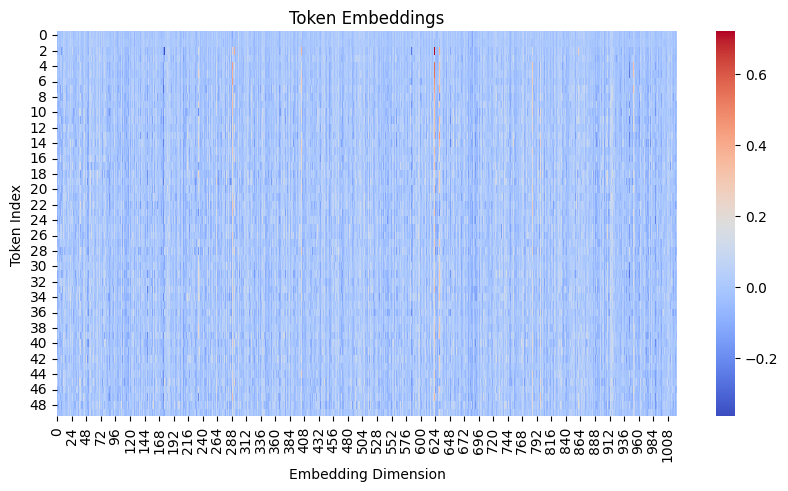

In [30]:
# Visualizing Token Embeddings
embed_tokens = model.model.encoder.embed_tokens.weight
visualize_embeddings(embed_tokens, "Token Embeddings")

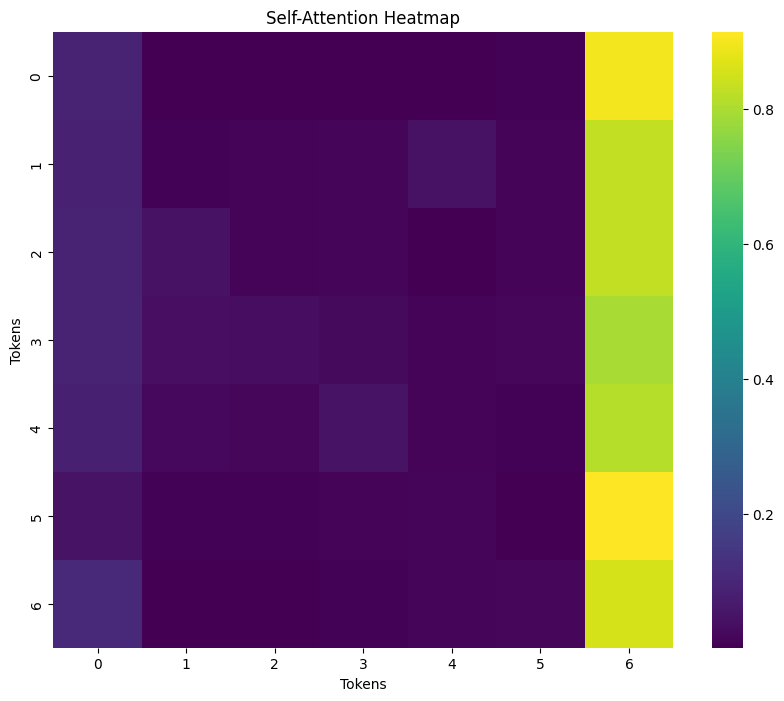

In [53]:
attn_weights = outputs.cross_attentions[0][0][0]  # First layer, first attention head
visualize_attention(attn_weights, "Self-Attention Heatmap")

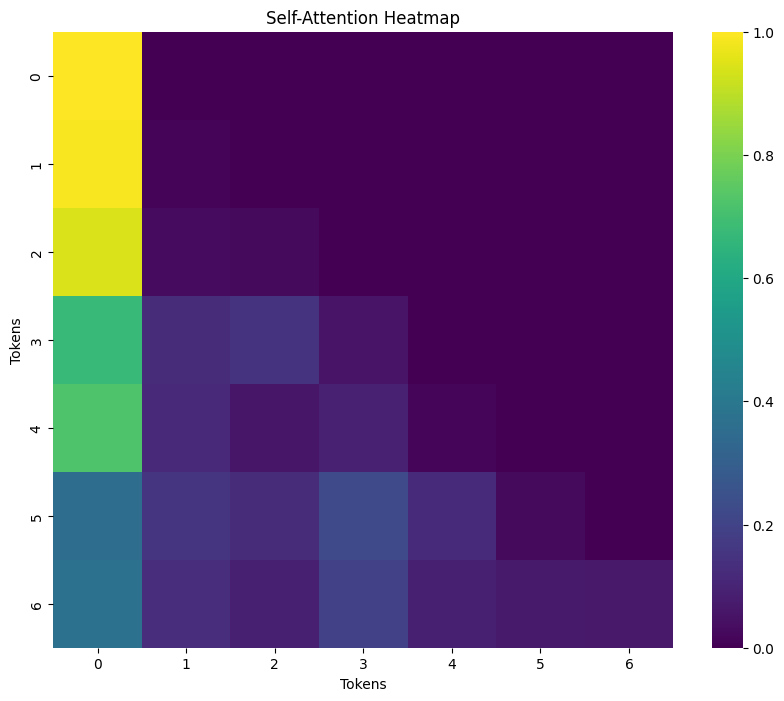

In [52]:
# Visualizing Attention Weights
attn_weights = outputs.decoder_attentions[0][0][0]  # First layer, first attention head
visualize_attention(attn_weights, "Self-Attention Heatmap")

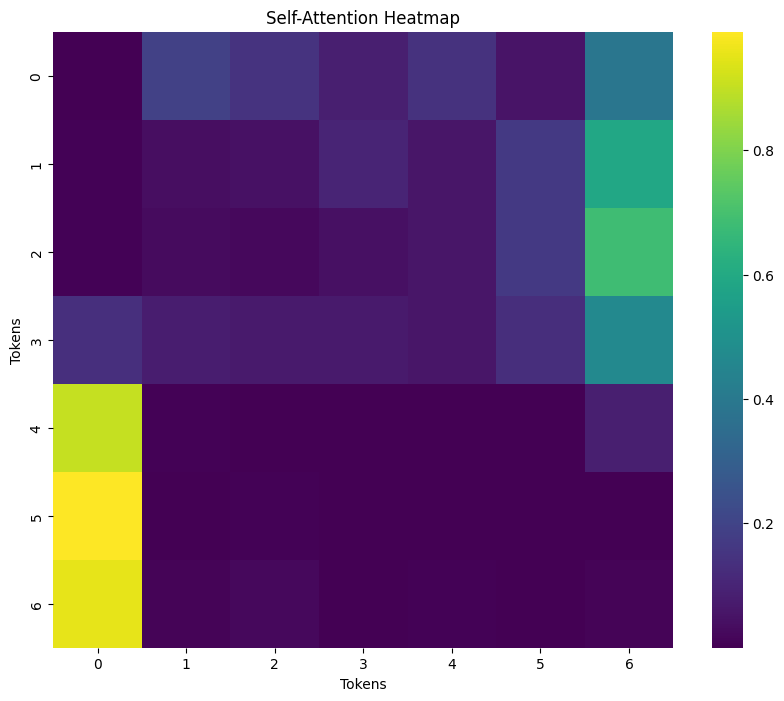

In [51]:
# Visualizing Attention Weights
attn_weights = outputs.encoder_attentions[0][0][0]  # First layer, first attention head
visualize_attention(attn_weights, "Self-Attention Heatmap")

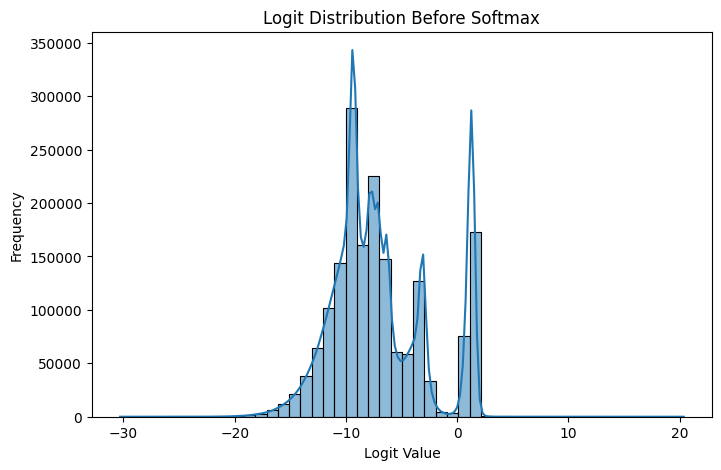

In [32]:
# Visualizing Logits Before Softmax
logits = outputs.logits[0]
visualize_logit_distribution(logits)

torch.Size([1026, 1024])

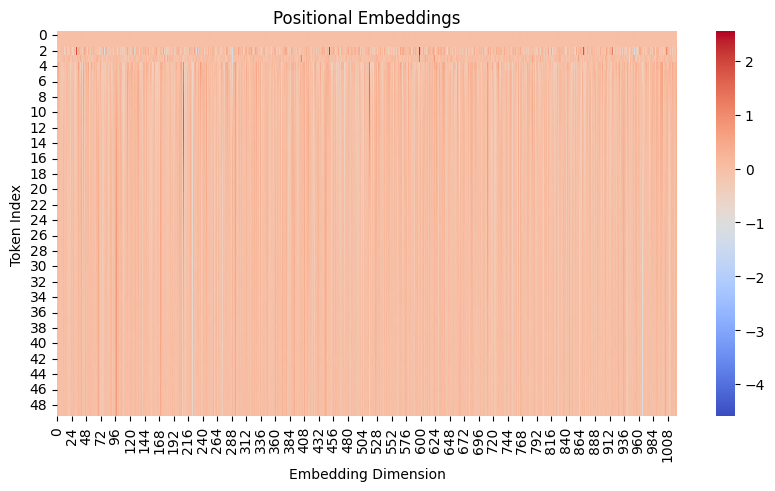

In [61]:
# Visualizing Positional Embeddings
pos_embed = model.model.decoder.embed_positions.weight
visualize_embeddings(pos_embed, "Positional Embeddings")

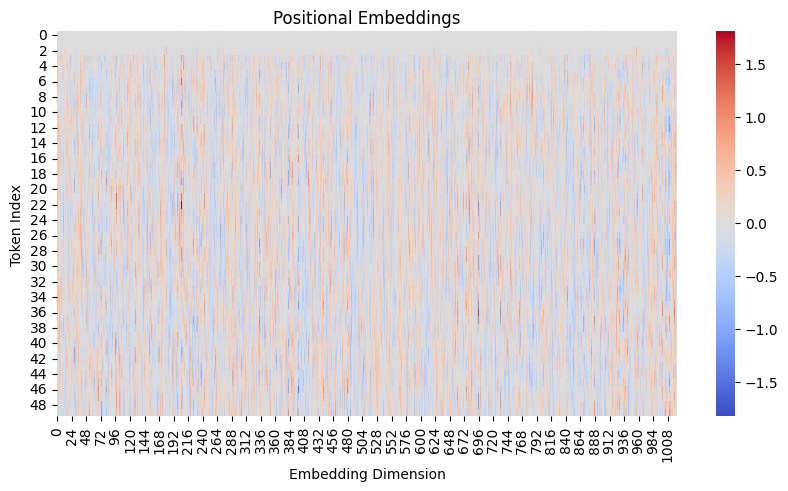

In [60]:
# Visualizing Positional Embeddings
pos_embed = model.model.encoder.embed_positions.weight
visualize_embeddings(pos_embed, "Positional Embeddings")

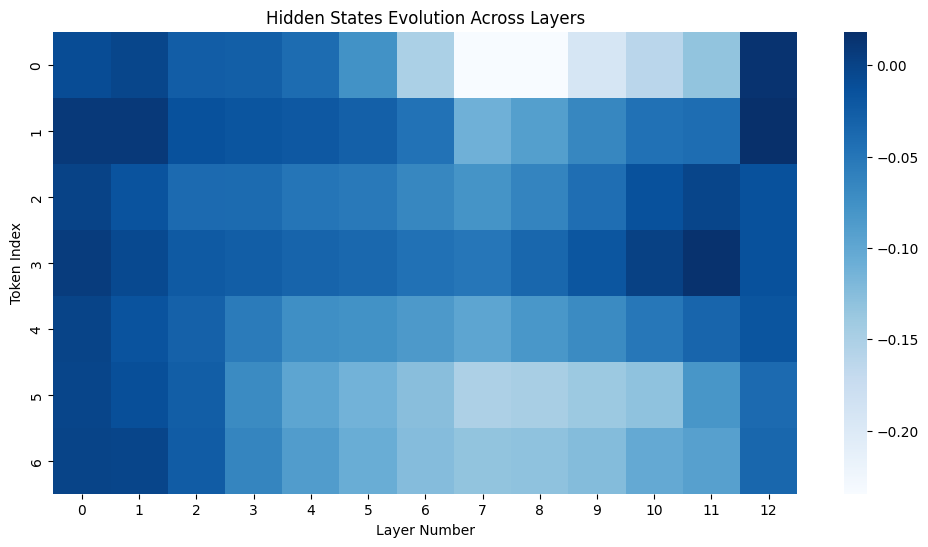

In [42]:
hidden_states = outputs.decoder_hidden_states
hidden_states = torch.stack(hidden_states).squeeze(1).mean(dim=2).cpu().numpy()
plt.figure(figsize=(12, 6))
sns.heatmap(hidden_states.T, cmap="Blues")
plt.title("Hidden States Evolution Across Layers")
plt.xlabel("Layer Number")
plt.ylabel("Token Index")
plt.show()

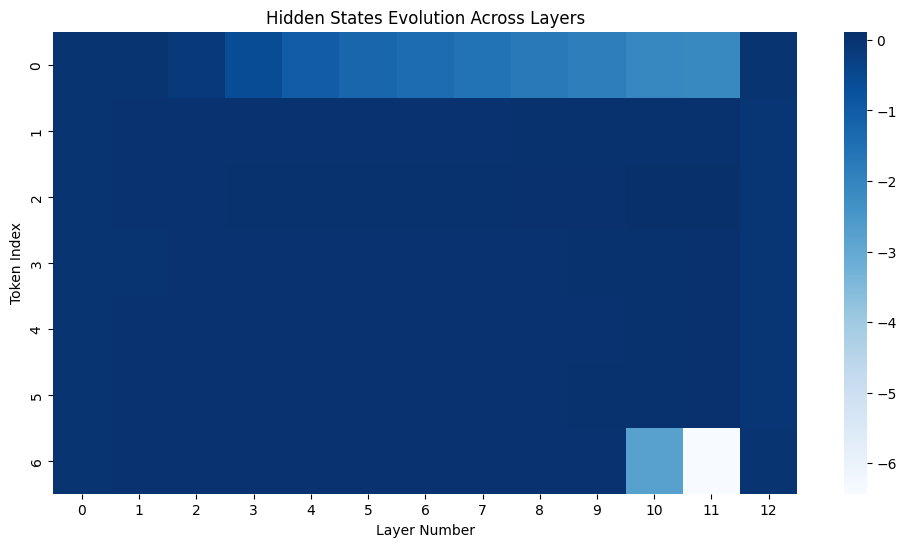

In [40]:
hidden_states = outputs.encoder_hidden_states
hidden_states = torch.stack(hidden_states).squeeze(1).mean(dim=2).cpu().numpy()
plt.figure(figsize=(12, 6))
sns.heatmap(hidden_states.T, cmap="Blues")
plt.title("Hidden States Evolution Across Layers")
plt.xlabel("Layer Number")
plt.ylabel("Token Index")
plt.show()

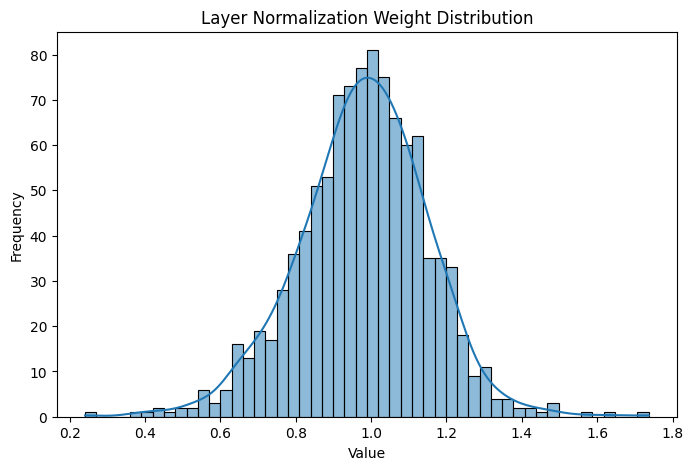

In [36]:
layer_norm = model.model.encoder.layernorm_embedding.weight.cpu().detach().numpy()
plt.figure(figsize=(8, 5))
sns.histplot(layer_norm, bins=50, kde=True)
plt.title("Layer Normalization Weight Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [38]:
dir(outputs)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'cross_attentions',
 'decoder_attentions',
 'decoder_hidden_states',
 'encoder_attentions',
 'encoder_hidden_states',
 'encoder_last_hidden_state',
 'fromkeys',
 'get',
 'items',
 'keys',
 'logits',
 'loss',
 'move_to_end',
 'past_key_values',
 'pop',
 'popitem',
 'setdefault',
 'to_tuple',
 'update',
 'values']

In [39]:
outputs.keys()

odict_keys(['logits', 'past_key_values', 'decoder_hidden_states', 'decoder_attentions', 'cross_attentions', 'encoder_last_hidden_state', 'encoder_hidden_states', 'encoder_attentions'])

In [20]:
# print(translate_nepali_to_english('गौरा पर्वजस्ता मेलाहरूले हावा संगीत नृत्य र भक्तिले भरिन्छन्'))
# print(translate_nepali_to_english("आज म धेरै खुसी छु"))